# PT Symmetric Study of Ising Model

Consider two spin lattices $A,\ B$ which are coupled at a single point.

The Hamiltonian for lattice $A$ is:

$H_A = \frac{-J}{2}\sum_{\langle i, j \rangle}^{N} \sigma_i \sigma_j + \mu_A \sum_{j=1}^N$


The Hamiltonian for lattice $B$ is:

$H_B = \frac{-J}{2}\sum_{\langle i, j \rangle}^{N} \sigma_i \sigma_j + \mu_B \sum_{j=1}^N$

where $\mu_B = -\mu_A$

In [1]:
import sys
print(sys.path)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import trange
from utils.MCIM import spinVis
from utils.MCIM import spinLattice
from utils.MCIM import metropolisAlgorithm
from utils.MCIM import torusPlotPoint
from utils.MCIM import torusPlotLine
from utils.MCIM import torusPlotSurface
import params as p

['/Users/ashley/PycharmProjects/MCIMS', '/Users/ashley/PycharmProjects/MCIMS', '/Users/ashley/PycharmProjects/MCIMS/utils', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/ashley/PycharmProjects/MCIMS/venv/lib/python3.7/site-packages', '/Users/ashley/PycharmProjects/MCIMS/venv/lib/python3.7/site-packages/IPython/extensions', '/Users/ashley/.ipython']


Declare Variables:

In [2]:
#beta_array = np.linspace(p.T_MIN, p.T_MAX, p.numTemp, endpoint=True)
beta_array = [p.T_MAX]
# Output parameters
d = {'beta': beta_array}
dataset = pd.DataFrame(data=d)

# Initialize main variables
spins = spinLattice(p.M, p.N, p.J, p.mu, 'point', p.k)
params = metropolisAlgorithm(p.BURN_IN, p.STEPS, beta_array)

Define coupling J matrix

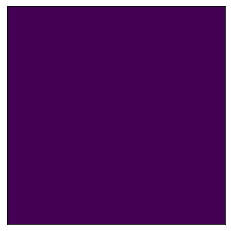

<Figure size 432x288 with 0 Axes>

In [3]:
J_matrix = spins.initJmatrix()
spinVis(J_matrix, 'J_matrix.png')


Define field $\mu$ matrix

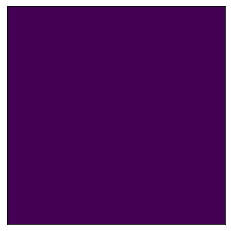

<Figure size 432x288 with 0 Axes>

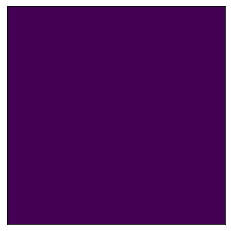

<Figure size 432x288 with 0 Axes>

In [4]:
mu_matrix = spins.initFieldmatrix()
spinVis(spins.mu_matrixA, 'mu_matrixA.png')
spinVis(spins.mu_matrixB, 'mu_matrixB.png')

Initialize lattice configuration

In [5]:
t = time.time()

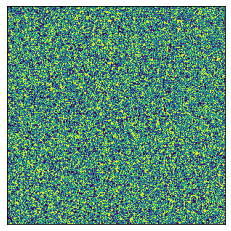

<Figure size 432x288 with 0 Axes>

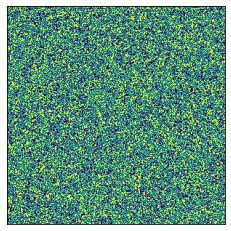

In [ ]:
# Make new lattice
spins.initPointCoupledLattice()

# visualize
spinVis(spins.latticeA, 'OG_spins_A'+str(0)+'_pt.png')
spinVis(spins.latticeB, 'OG_spins_B'+str(0)+'_pt.png')
torusPlotPoint(spins, 'OG_spins_3D'+str(0)+'.png', save=True)

In [ ]:
rawData = []

for i in range(p.numTrials):
    nHS_A_tmp = np.empty(p.STEPS)
    nHS_B_tmp = np.empty(p.STEPS)

    # anneal
    df, d, nHS_A_tmp, nHS_B_tmp = \
        params.anneal(spins, J_matrix, mu_matrix, nHS_A_tmp, nHS_B_tmp, i)

    dataset = pd.concat([dataset, df], axis=1)
    rawData.append(nHS_A_tmp)
    rawData.append(nHS_B_tmp)
    ### Show Final lattice:

    # spinVis(spins.latticeA, 'spinsFinal_A_'+str(i)+'.png')
    # spinVis(spins.latticeB, 'spinsFinal_B_'+str(i)+'.png')
    torusPlotPoint(spins, 'spins_3D_'+str(i)+'.png', save=True)
    dataFileName = 'data'+str(i)+'.csv'
    d = {'steps': np.linspace(1, p.STEPS, p.STEPS), 'A': dataset['nHS_A_0'][0], 'B': dataset['nHS_B_0'][0]}
    lol = pd.DataFrame(data=d)
    lol.to_csv(dataFileName, index=False)

    fig, ax = plt.subplots()
    for col in dataset:
        if col.startswith('nHS'):
            ax.scatter(np.linspace(1, p.STEPS, p.STEPS),dataset[col][0], alpha=1, label=col, s=1)

    ax.set(xlabel=r'Time (MC Steps)', ylabel=r'$n_{HS}$',
           title=r'$n_{HS}$ Coupling vs Time')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)

    figName = 'nHS_v_Steps_'+str(i)+'.png'
    plt.savefig(figName)

    if i < p.numTrials:
        spins.initPointCoupledLattice()

In [ ]:
elapsed = time.time() - t

print(elapsed)

In [ ]:
fig, ax = plt.subplots()
for col in dataset:
    if col.startswith('nHS'):
        ax.scatter(np.linspace(1, p.STEPS, p.STEPS),dataset[col][0], alpha=1, label=col, s=1)

ax.set(xlabel=r'Time (MC Steps)', ylabel=r'$n_{HS}$',
       title=r'$n_{HS}$ Coupling vs Time')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)

figName = 'nHS_v_Steps_'+str(i)+'.png'
plt.savefig(figName)